<a href="https://colab.research.google.com/github/hanbiphyun/ESSA_YB/blob/main/ESAA_YB3_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

In [133]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# train data 열기
traindata=pd.read_csv('/content/train.csv')
traindata.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [6]:
# test data 열기
testdata=pd.read_csv('/content/test.csv')
testdata.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [7]:
# sample submission 열기
samplesubmission=pd.read_csv('/content/sample_submission.csv')
samplesubmission.head()

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


## 데이터 전처리

In [137]:
traindata.shape

(5497, 14)

In [138]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


index 구분자

quality 품질

fixed acidity 산도

volatile acidity 휘발성산

citric acid 시트르산

residual sugar 잔당 : 발효 후 와인 속에 남아있는 당분

chlorides 염화물

free sulfur dioxide 독립 이산화황

total sulfur dioxide 총 이산화황

density 밀도

pH 수소이온농도

sulphates 황산염

alcohol 도수

type 종류

**NaN, Null값은 존재하지 않음**

In [139]:
traindata.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


### index 피처 제거

In [8]:
# index 피처 제거
traindata.drop(['index'],axis=1,inplace=True)
testdata.drop(['index'],axis=1,inplace=True)

### type 변수를 white=0, red=1로 변경

In [9]:
# type 변수를 white=0, red=1로 변경
traindata['type']=traindata['type'].map({'white':0,'red':1}).astype(int)
testdata['type']=testdata['type'].map({'white':0,'red':1}).astype(int)

In [142]:
# traindata 확인
traindata.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0


In [143]:
# testdata 확인
testdata.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,0
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,1
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,0
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,0
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,0


## 탐색적 자료 분석

### **1. 전체적인 상관관계 보기**

In [144]:
import matplotlib.pyplot as plt
import seaborn as sns

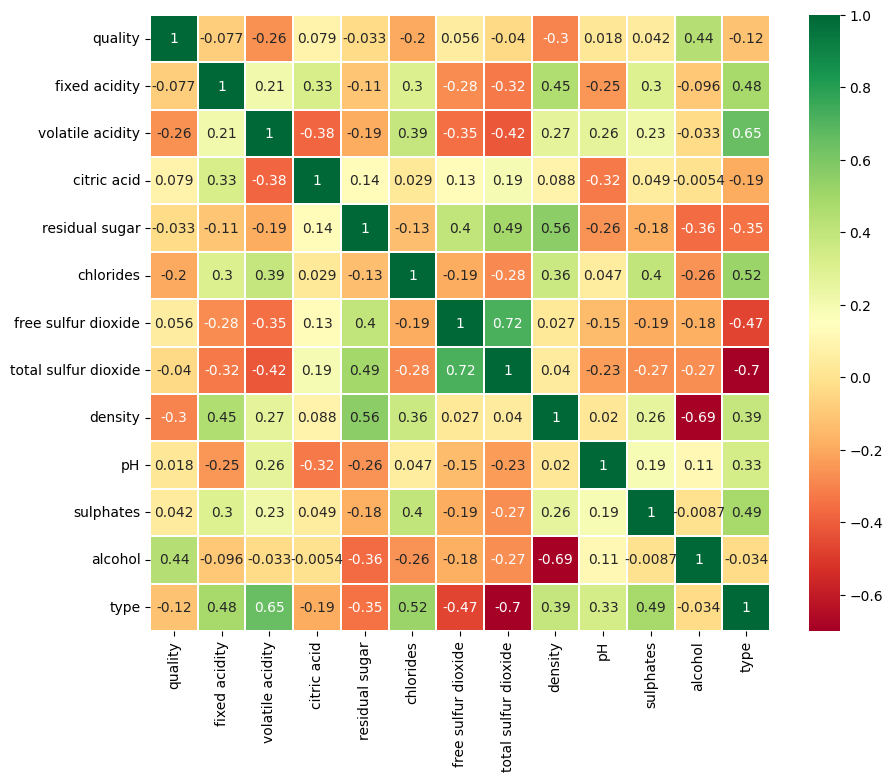

In [145]:
cols=['quality','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','type']
sns.heatmap(traindata[cols].corr(),annot=True,cmap='RdYlGn',linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### **2. 품질이 어떻게 분포되어 있는가?**

- 6이 가장 많고, 5와 7까지 많다.
- 3, 9는 매우 적다.

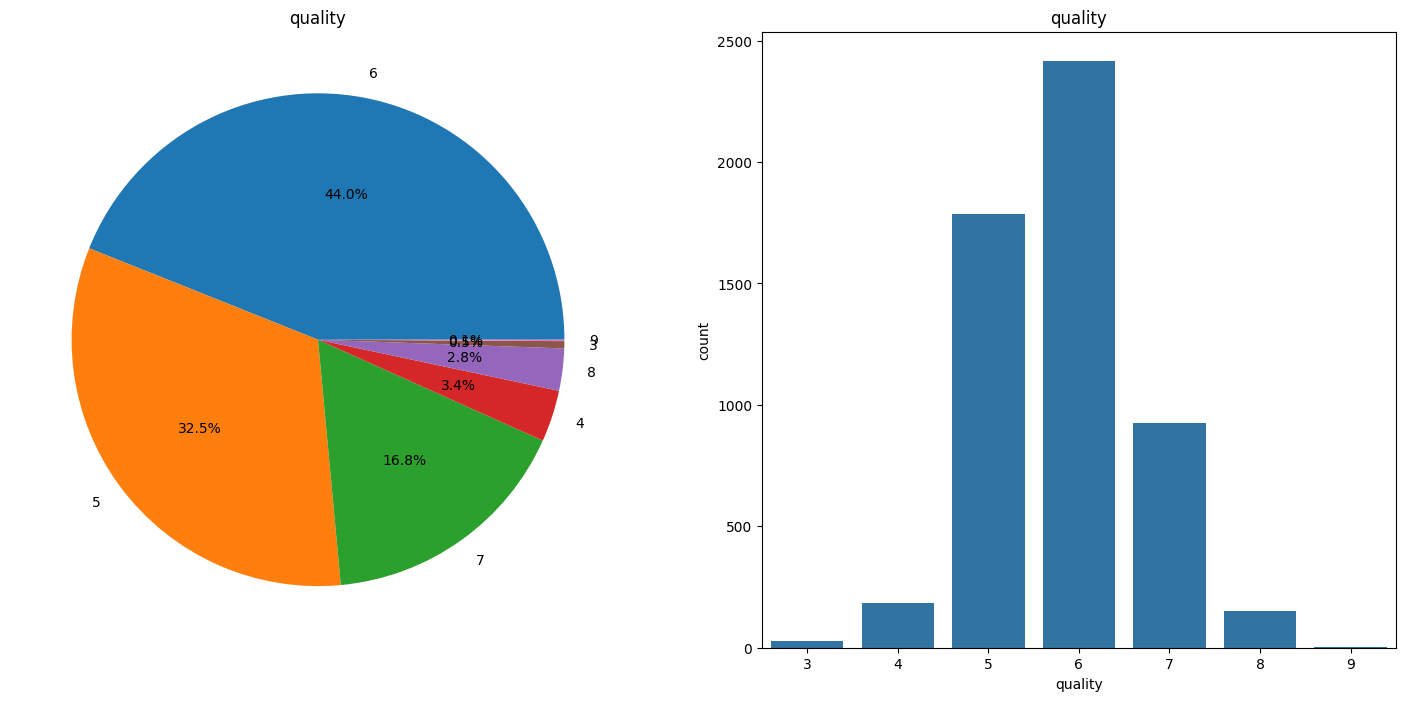

In [146]:
# traindata에서 quality를 원그래프, 막대그래프로 그려보기
f,ax=plt.subplots(1,2,figsize=(18,8))
# Calculate the number of unique quality values
num_qualities = traindata['quality'].nunique()

traindata['quality'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_title('quality')
ax[0].set_ylabel('')
sns.countplot(x='quality',data=traindata,ax=ax[1])
ax[1].set_title('quality')
plt.show()

### **3. 다른 피처들의 분포는 어떻게 나타나는가? - 히스토그램**

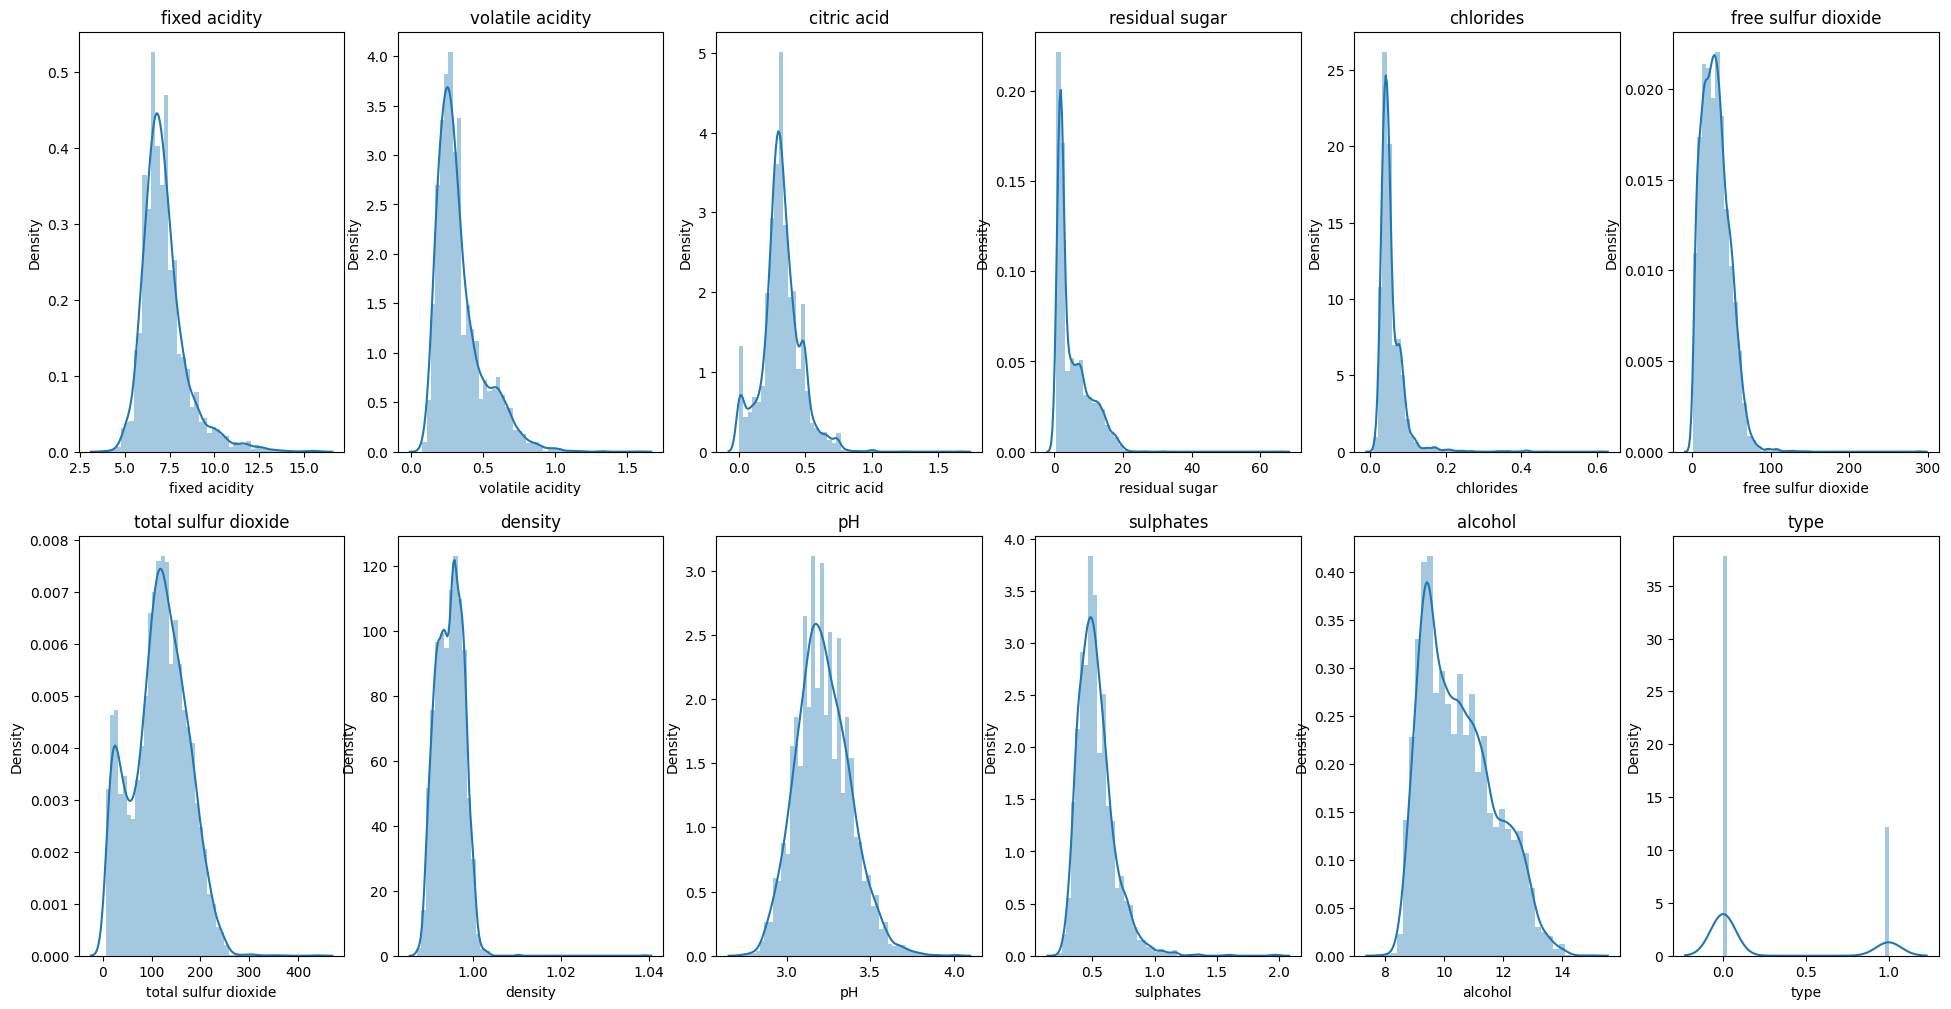

In [147]:
f,ax=plt.subplots(2,6,figsize=(24,12))
sns.distplot(traindata['fixed acidity'],ax=ax[0,0])
ax[0,0].set_title('fixed acidity')
sns.distplot(traindata['volatile acidity'],ax=ax[0,1])
ax[0,1].set_title('volatile acidity')
sns.distplot(traindata['citric acid'],ax=ax[0,2])
ax[0,2].set_title('citric acid')
sns.distplot(traindata['residual sugar'],ax=ax[0,3])
ax[0,3].set_title('residual sugar')
sns.distplot(traindata['chlorides'],ax=ax[0,4])
ax[0,4].set_title('chlorides')
sns.distplot(traindata['free sulfur dioxide'],ax=ax[0,5])
ax[0,5].set_title('free sulfur dioxide')
sns.distplot(traindata['total sulfur dioxide'],ax=ax[1,0])
ax[1,0].set_title('total sulfur dioxide')
sns.distplot(traindata['density'],ax=ax[1,1])
ax[1,1].set_title('density')
sns.distplot(traindata['pH'],ax=ax[1,2])
ax[1,2].set_title('pH')
sns.distplot(traindata['sulphates'],ax=ax[1,3])
ax[1,3].set_title('sulphates')
sns.distplot(traindata['alcohol'],ax=ax[1,4])
ax[1,4].set_title('alcohol')
sns.distplot(traindata['type'],ax=ax[1,5])
ax[1,5].set_title('type')
plt.show()

### **4. 품질(가로)에 따라 다른 변수들이 어떻게 나타나는가?**

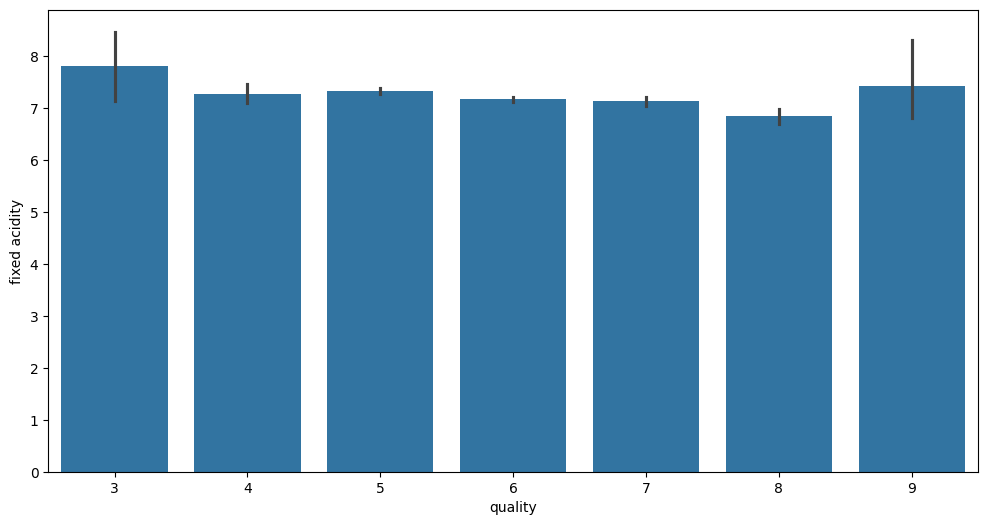

In [148]:
# quality(가로) fixed acidity
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='fixed acidity',data=traindata)
plt.show()

### 3과 9에서 fixed acidity 평균이 높게 나왔는데, 그냥 3과 9의 수가 적어서 그런 것 같음.

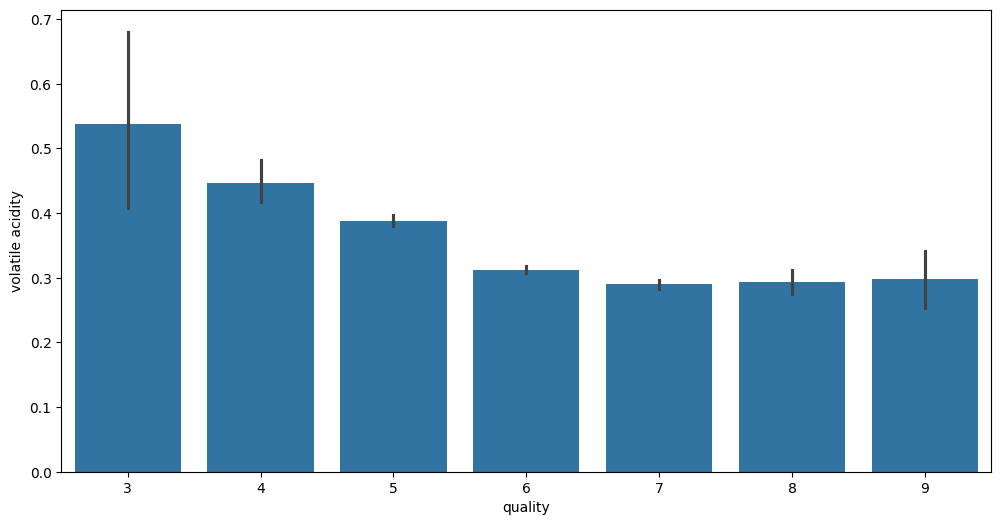

In [149]:
# quality(가로) volatile acidity
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='volatile acidity',data=traindata)
plt.show()

### 4~7까지(traindata 수가 많은 것들)에서 volatile acidity에서 차이가 남.
### 3에서는 데이터 수가 적어서 잘 모르겠음.

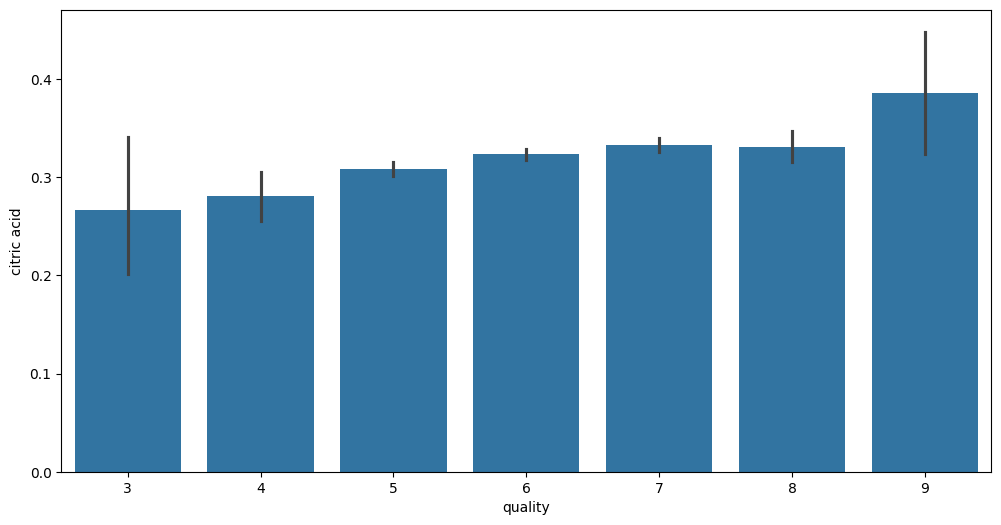

In [150]:
# quality(가로) citric acid
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='citric acid',data=traindata)
plt.show()

### 3과 9는 자료의 수가 적음.
### 4~7까지에서 citric acid가 증가하는 추세를 보임.
### 8에서는 7과 비슷..

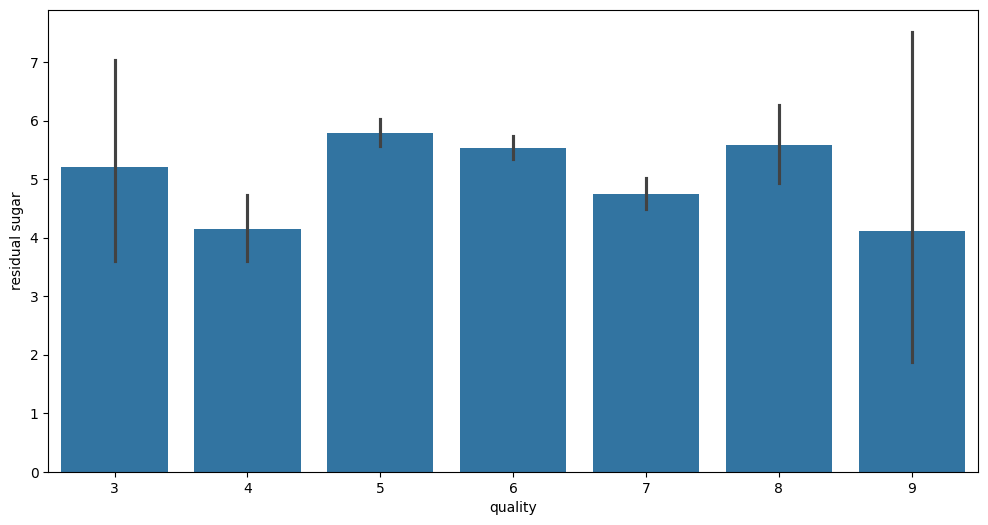

In [151]:
# quality(가로) residual sugar
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='residual sugar',data=traindata)
plt.show()

### 5, 6과 7 사이에서 눈에 띄게 차이가 남.
### 3. 4. 8. 9도 차이가 잘 나타나긴 하지만 자료의 수가 적음.

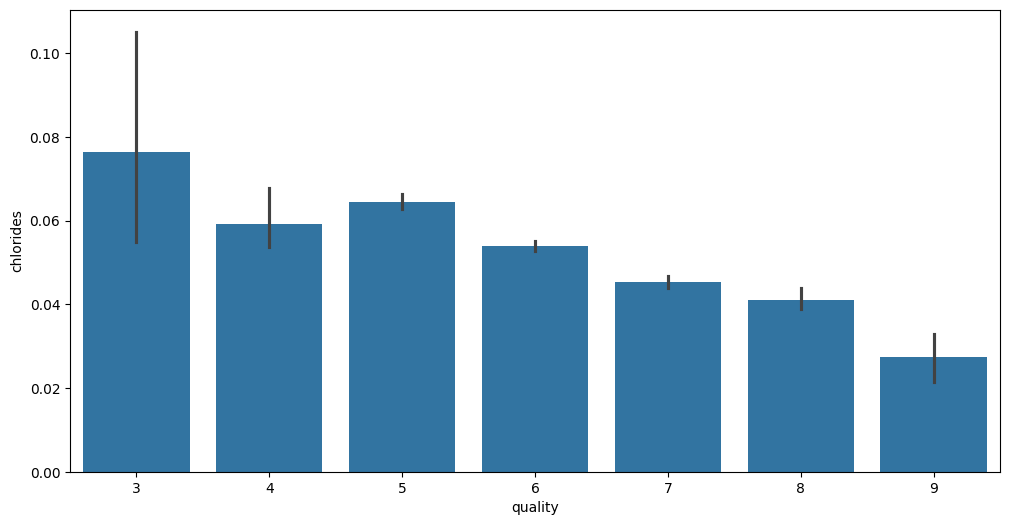

In [152]:
# quality(가로) chlorides
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='chlorides',data=traindata)
plt.show()

### cholrides에 대해서는 quality가 높아질수록 줄어드는 추세.

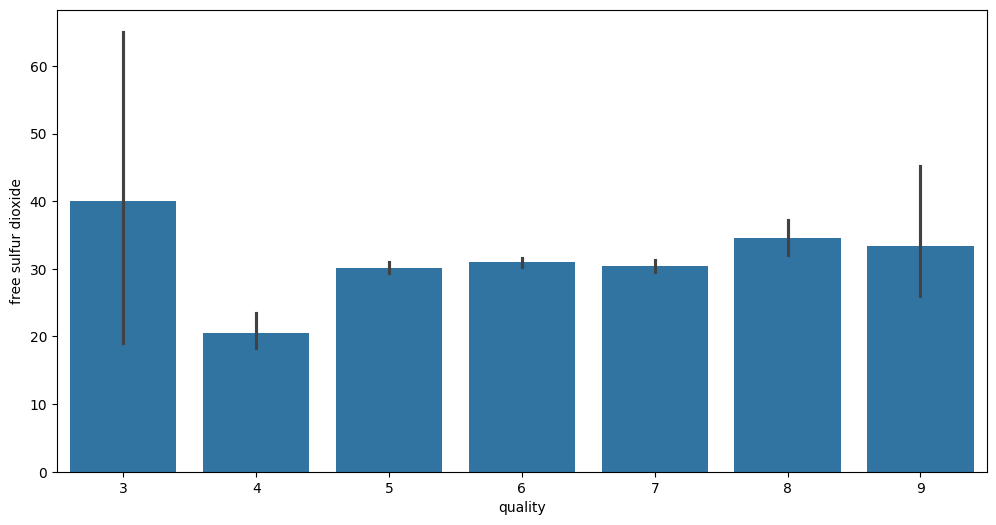

In [153]:
# quality(가로) free sulfur dioxide
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='free sulfur dioxide',data=traindata)
plt.show()

### free sulfur dioxide는 5, 6, 7에서 거의 비슷함.
### 4와 8에서 큰 변화가 보임.

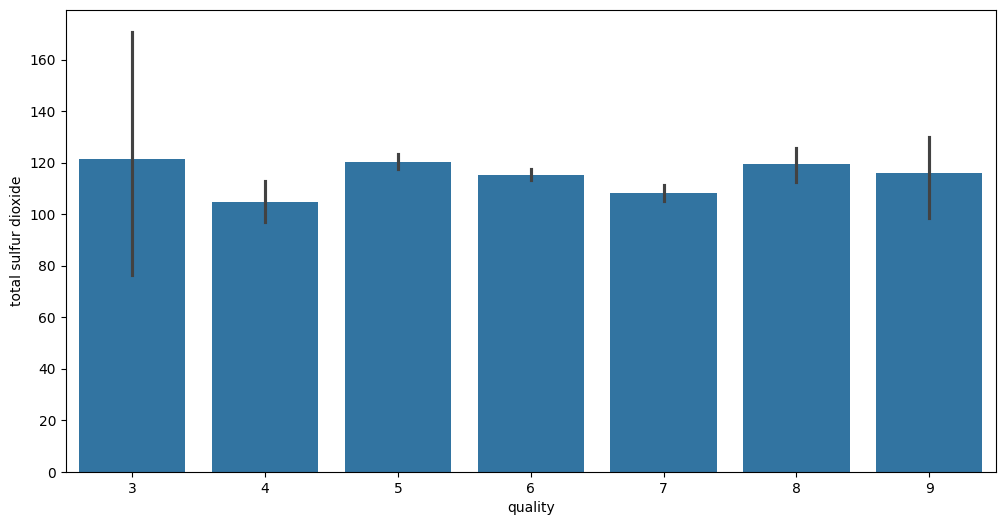

In [154]:
# quality(가로) total sulfur dioxide
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='total sulfur dioxide',data=traindata)
plt.show()

### 5~7에서 total sulfur dioxide가 줄어드는 추세로 나타남.

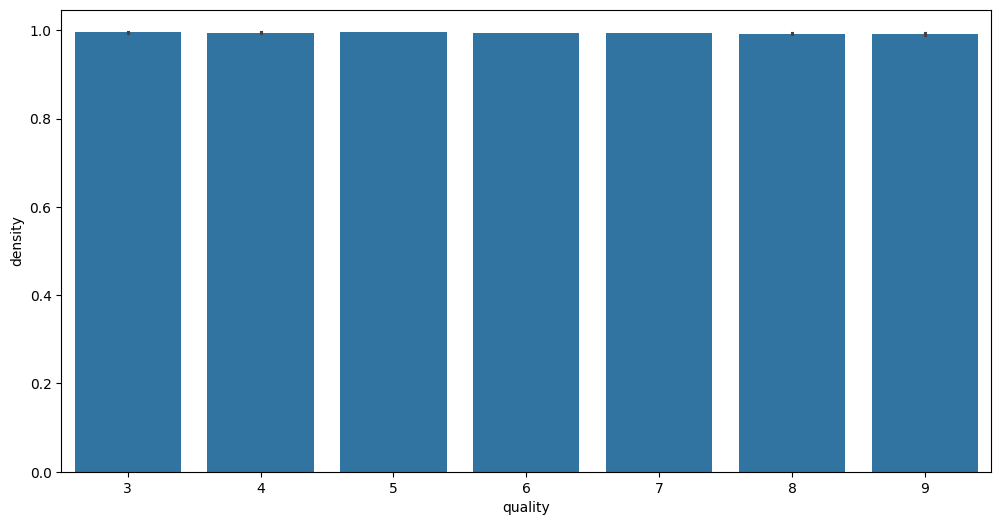

In [155]:
# quality(가로) density
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='density',data=traindata)
plt.show()

### density의 경우 경향이 보이는 것은 없음.

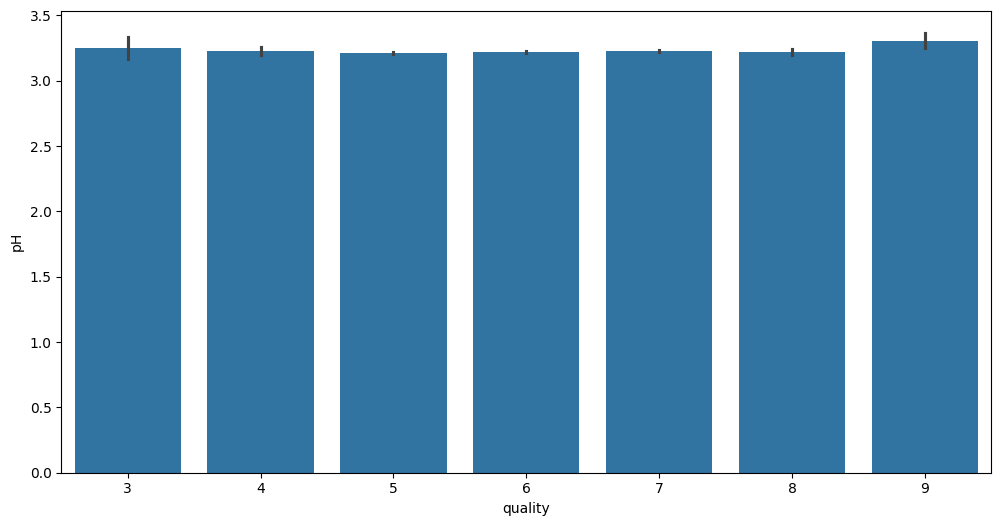

In [156]:
# quality(가로) pH
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='pH',data=traindata)
plt.show()

### pH의 경우에도 크게 보이는 것 없음.

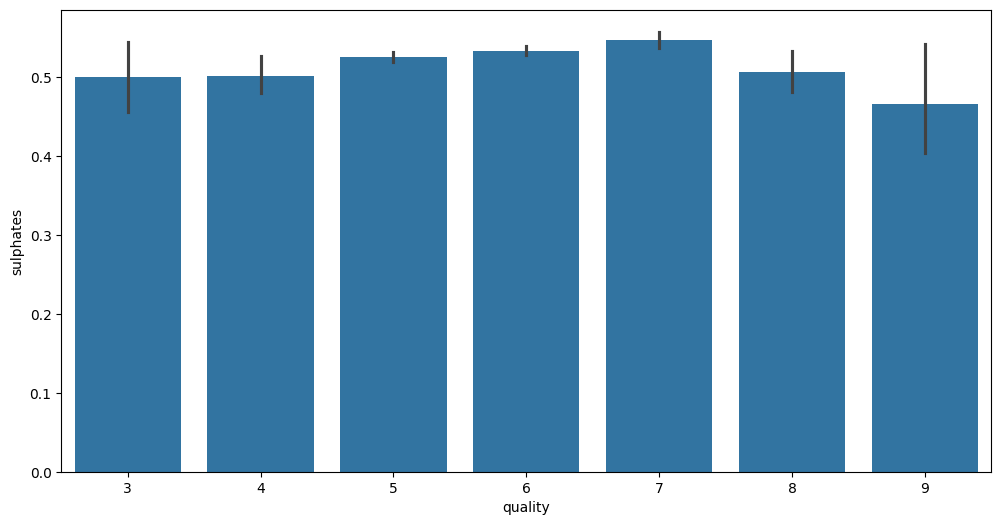

In [157]:
# quality(가로) sulphates
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='sulphates',data=traindata)
plt.show()

### 4~7에서 sulphates가 증가하는 추세를 보임.

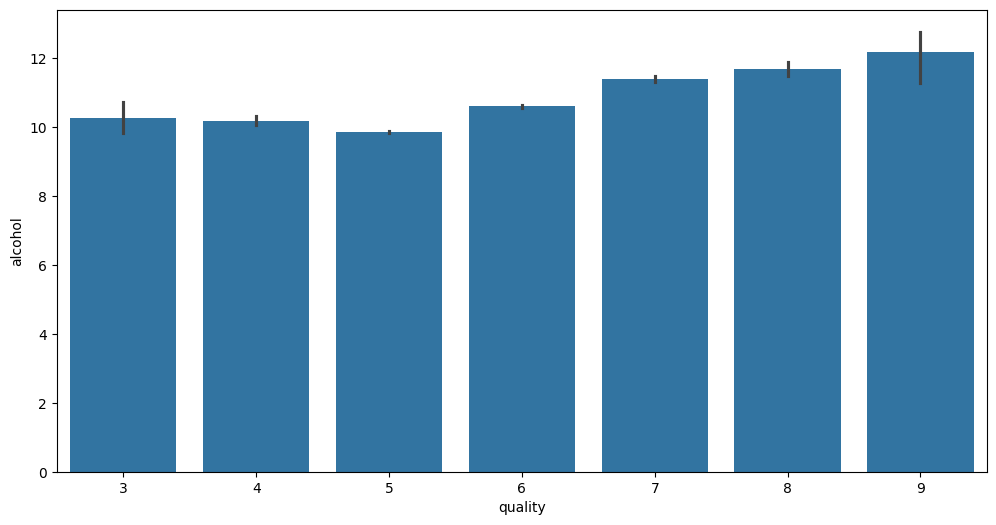

In [158]:
# quality(가로) alcohol
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='alcohol',data=traindata)
plt.show()

### 5~8까지 alcohol이 증가하는 추세임. quality가 높을수록 alcohol이 증가??

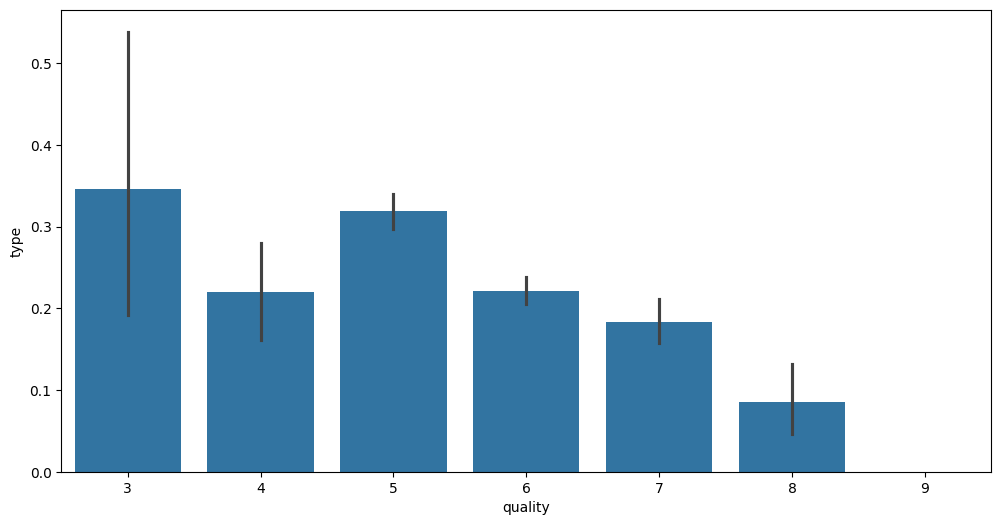

In [159]:
# quality(가로) type
plt.figure(figsize=(12,6))
sns.barplot(x='quality',y='type',data=traindata)
plt.show()

### white의 개수가 red보다 더 많음.
### 5~7에서 white 와인의 수가 늘어남. 9에서는 대부분 white인 듯.

**quality 9의 와인의 종류만 알아보기**

In [160]:
# quality 9의 와인의 종류
traindata[traindata['quality']==9]

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
561,9,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,0
2194,9,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,0
2324,9,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,0
3198,9,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,0
3497,9,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,0


### **5. quality와 크게 상관관계를 나타내는 것**

1. volatile acidity: -0.26
2. chlorides: -0.2
3. density: -0.3
4. alcohol: 0.44

**->이것들만 boxplot을 그려보자**

#### **5-1. 휘발성 산도가 낮을수록 품질이 좋다**

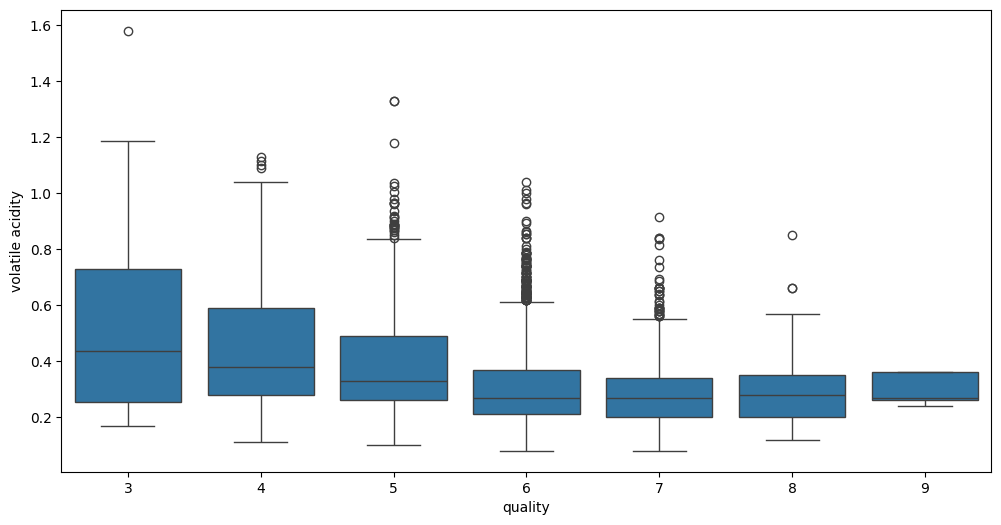

In [161]:
# volatile acidity
plt.figure(figsize=(12,6))
sns.boxplot(x='quality',y='volatile acidity',data=traindata)
plt.show()

### 품질이 높아질수록 박스의 중앙값이 낮아지고 있기에 휘발성 산도가 낮을수록 품질이 좋은 경향이 있음

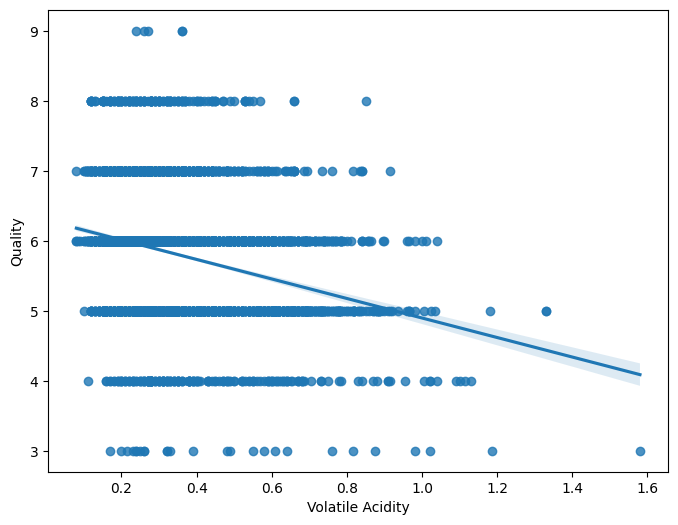

In [162]:
plt.figure(figsize=(8,6))
sns.regplot(x='volatile acidity', y='quality', data=traindata)
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.show()

### 회귀선으로 봤을 때, 확실히 품질이 낮아질수록 휘발성 산도가 높아지는 것이 보임

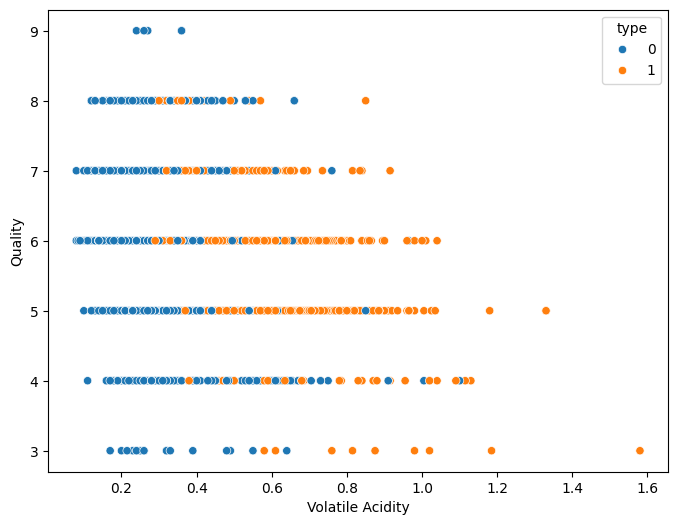

In [163]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='volatile acidity', y='quality', hue='type', data=traindata)
plt.xlabel('Volatile Acidity')
plt.ylabel('Quality')
plt.show()

### 레드와인이 대체로 휘발성 산도가 높게 나타남

#### **5-2. 칼로리가 낮을수록 품질이 높다**

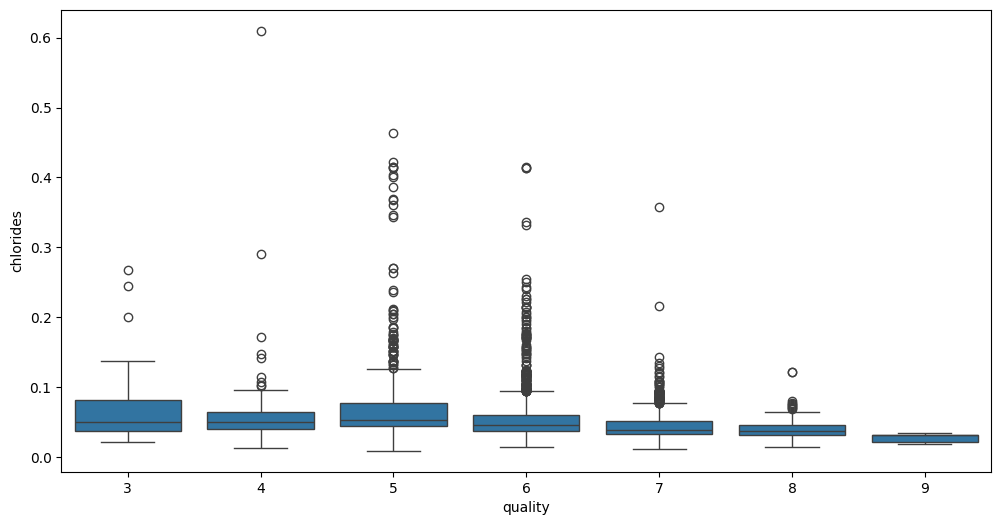

In [164]:
# chlorides
plt.figure(figsize=(12,6))
sns.boxplot(x='quality',y='chlorides',data=traindata)
plt.show()

#### **5-3. 밀도가 낮을수록 품질이 좋다**

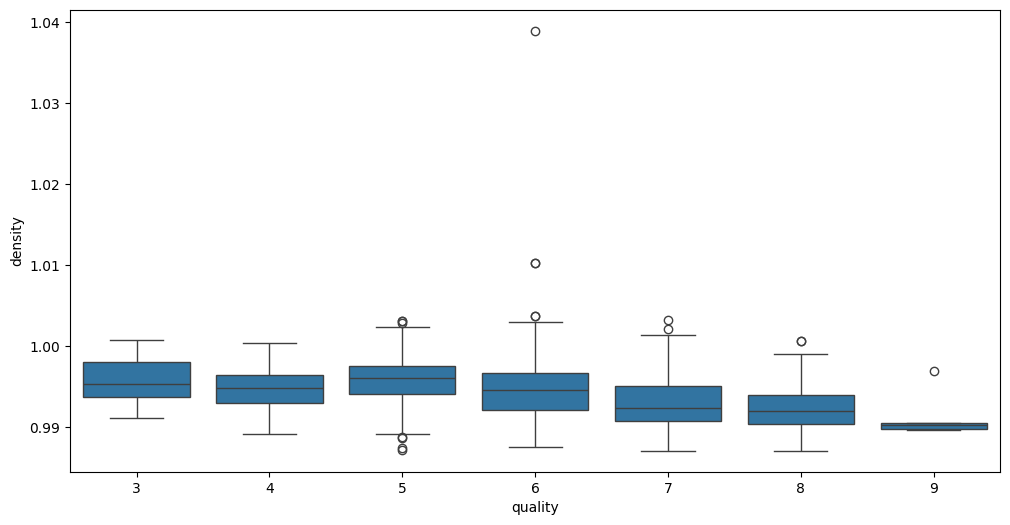

In [165]:
# density
plt.figure(figsize=(12,6))
sns.boxplot(x='quality',y='density',data=traindata)
plt.show()

#### **5-4. 알코올 도수가 높을수록 품질이 좋다**

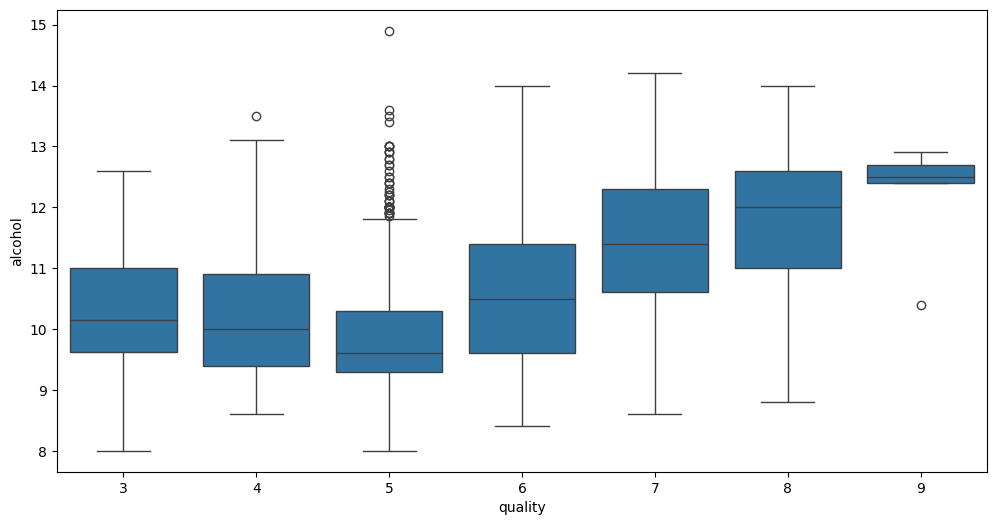

In [166]:
# alcohol
plt.figure(figsize=(12,6))
sns.boxplot(x='quality',y='alcohol',data=traindata)
plt.show()

### 중앙값이 품질 오른쪽으로 갈수록 위로 이동하고 있기에 알코올 도수가 높을수록 품질이 좋다는 점을 확인할 수 있음

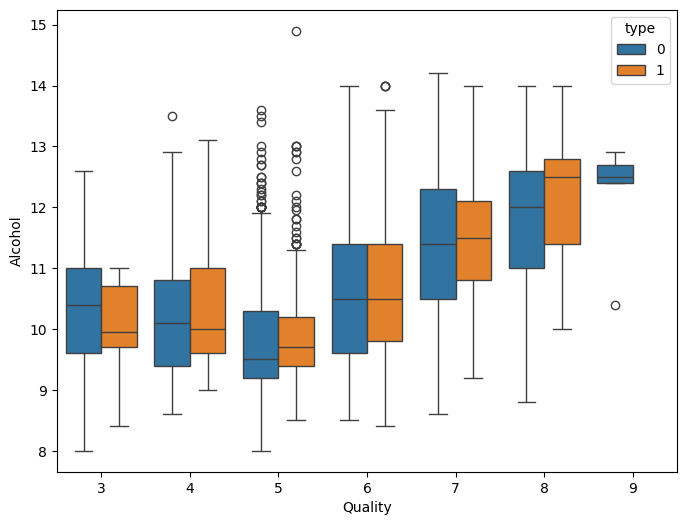

In [167]:
plt.figure(figsize=(8,6))
sns.boxplot(x='quality', y='alcohol', data=traindata, hue='type')
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

### 종류별 차이를 봤을 때, 파란색인 화이트와인은 품질이 증가할 때 알코올이 급격히 상승하고 레드와인은 완만하게 상승함
### 전반적으로 알코올 도수가 높을수록 품질이 높은 경향은 있지만, 이 가설은 화이트와인에서 더 강하게 나타나는 것으로 보임
### 레드와인은 이미 평균적으로 알코올이 높아서 품질 간 차이가 작은 것으로 판단됨

### **6. 다른 요인 간의 관계**

#### 6-1. 와인 종류별 잔당

**화이트와인의 잔당 > 레드와인의 잔당**

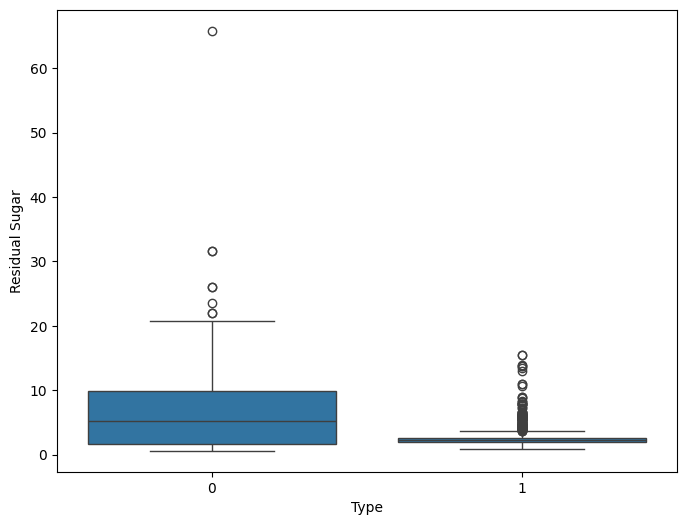

In [168]:
plt.figure(figsize=(8,6))
sns.boxplot(x='type', y='residual sugar', data=traindata)
plt.xlabel('Type')
plt.ylabel('Residual Sugar')
plt.show()

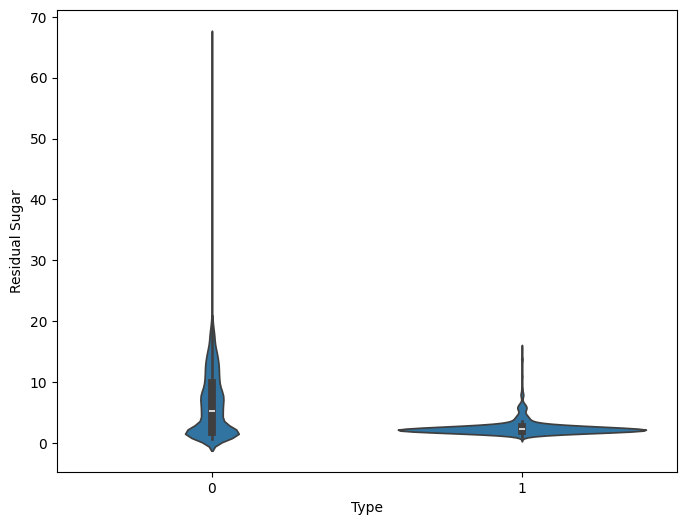

In [169]:
plt.figure(figsize=(8,6))
sns.violinplot(x='type', y='residual sugar', data=traindata)
plt.xlabel('Type')
plt.ylabel('Residual Sugar')
plt.show()

### 화이트와인이 위쪽으로 더 길게 늘어나고 있기에 더 높은 잔당을 많이 가지고 있음을 알 수 있음

#### 6-2. 와인 종류별 밀도

**화이트와인의 밀도 < 레드와인의 밀도**

당이 높으면 밀도가 높은데 왜 화이트와인의 밀도가 더 낮지...? >> **알코올 도수와도 관련이 있을 것 같음**

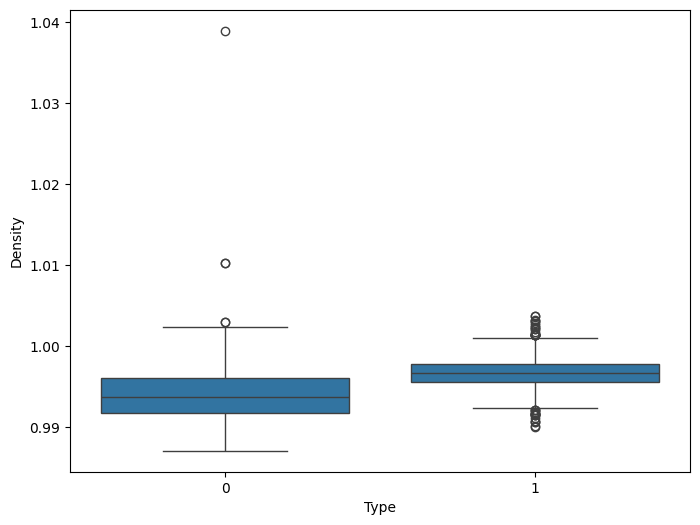

In [170]:
plt.figure(figsize=(8,6))
sns.boxplot(x='type', y='density', data=traindata)
plt.xlabel('Type')
plt.ylabel('Density')
plt.show()

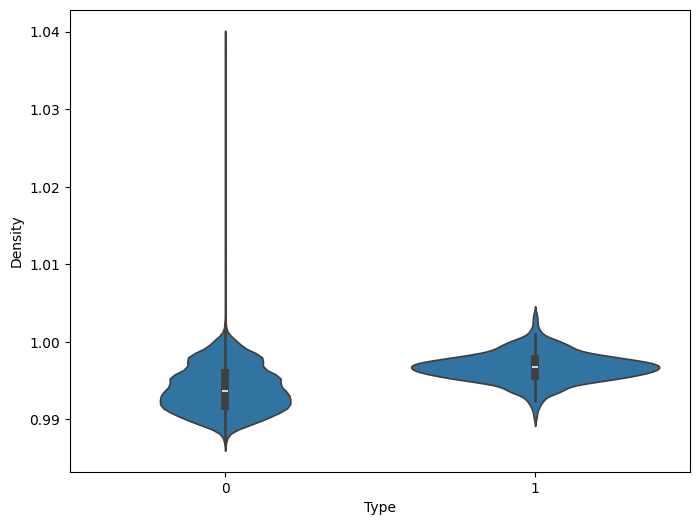

In [171]:
plt.figure(figsize=(8,6))
sns.violinplot(x='type', y='density', data=traindata)
plt.xlabel('Type')
plt.ylabel('Density')
plt.show()

#### 6-3. 밀도와 알코올

**알코올이 높을수록 밀도가 낮아짐**

**화이트와인은 당이 많지만 알코올이 훨씬 많아서 밀도가 더 낮게 측정됨**

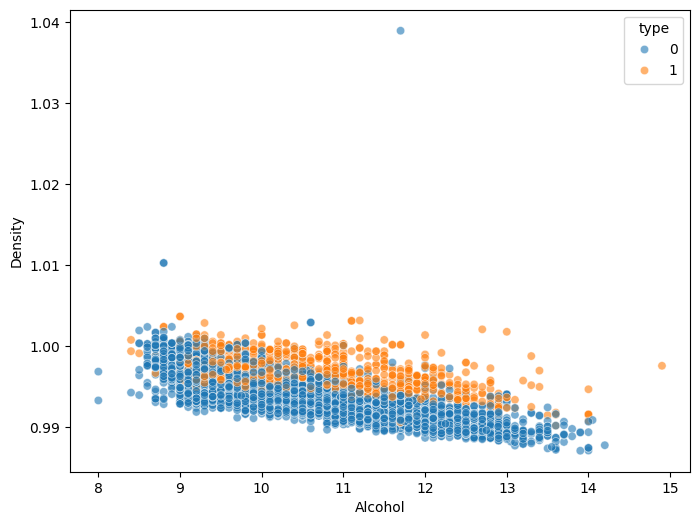

In [172]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='alcohol', y='density', hue='type', data=traindata, alpha=0.6)
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.show()

### 알코올이 높을수록 밀도가 낮아지는 경향이 보임
### 그러면 알코올이 밀도에 추가적인 영향을 주나봄
### 당보다 알코올이 밀도에 더 큰 영향을 미치는 것으로 보임
### 화이트와인은 당이 많지만 알코올이 훨씬 더 많아서 밀도가 더 낮게 측정되는 듯

! XGBoost로 피처 중요도 확인

! LightGBM으로 피처 중요도 확인///

일단 모델학습하고 피처 중요도 본다음에 필요없는 피처 드랍할게요!

랜덤포레스트, XGBoost

In [10]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Define features (X) and target (y)
X = traindata.drop('quality', axis=1)
y = traindata['quality']

y=y-y.min()
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


#스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_tr, X_val, y_tr, y_val= train_test_split(X_train_scaled, y_train, test_size=0.3, random_state=0)

#모델리스트
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, eval_metric='mlogloss')
}

In [174]:
print("Baseline (SMOTE 적용 전)")
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"\n▶ {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


print("\n\nSMOTE 적용 후")
smote = SMOTE(random_state=42, k_neighbors=3)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# 클래스 균형 확인
print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", pd.Series(y_train_res).value_counts().to_dict())

#모델 재학습 (SMOTE 적용 후)
for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred_res = model.predict(X_test_scaled)
    print(f"\n▶ {name} (with SMOTE)")
    print("Accuracy:", accuracy_score(y_test, y_pred_res))
    print(classification_report(y_test, y_pred_res))

Baseline (SMOTE 적용 전)

▶ Logistic Regression
Accuracy: 0.5636363636363636
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       1.00      0.07      0.14        41
           2       0.57      0.63      0.60       346
           3       0.56      0.70      0.63       515
           4       0.49      0.24      0.32       161
           5       0.00      0.00      0.00        29
           6       0.00      0.00      0.00         1

    accuracy                           0.56      1100
   macro avg       0.38      0.23      0.24      1100
weighted avg       0.55      0.56      0.53      1100


▶ Random Forest
Accuracy: 0.6845454545454546
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.60      0.07      0.13        41
           2       0.68      0.75      0.71       346
           3       0.68      0.77      0.72       515
           4

모델학습
randomforest

In [175]:
# 모델 정의
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    random_state=0
)

# 모델 학습
rf_clf.fit(X_train_scaled, y_train)

# 예측
rf_pred = rf_clf.predict(X_test_scaled)

# 평가
print("[Random Forest Results]")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print("\nClassification Report:\n", classification_report(y_test, rf_pred))



[Random Forest Results]
Accuracy: 0.6772727272727272

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00        41
           2       0.67      0.74      0.70       346
           3       0.67      0.79      0.72       515
           4       0.73      0.48      0.58       161
           5       1.00      0.24      0.39        29
           6       0.00      0.00      0.00         1

    accuracy                           0.68      1100
   macro avg       0.44      0.32      0.34      1100
weighted avg       0.66      0.68      0.65      1100



In [176]:
print('RandomForestClassifier 기본 하이퍼 파라미터: \n' ,rf_clf.get_params())

RandomForestClassifier 기본 하이퍼 파라미터: 
 {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [177]:
from sklearn.model_selection import GridSearchCV


params = {
    'n_estimators': [100, 200, 300],  # 트리 개수도 추가
    'max_depth': [6, 8, 10, 12, 16],
    'min_samples_split': [2, 8, 16],
    'min_samples_leaf': [1, 4, 8]  # 리프 노드 최소 샘플 수도 고려
}

# GridSearchCV 설정
grid_cv = GridSearchCV(
    rf_clf,
    param_grid=params,
    cv=3,
    scoring='accuracy',  # 분류니까 정확도 사용
    n_jobs=-1,
    verbose=2
)

# 학습 수행
grid_cv.fit(X_train, y_train)

# 결과 확인
print("Best Parameters:", grid_cv.best_params_)
print("Best Cross-Validation Score:", grid_cv.best_score_)


Fitting 3 folds for each of 135 candidates, totalling 405 fits
Best Parameters: {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score: 0.6408929283711026


In [178]:
best_rf= grid_cv.best_estimator_
best_rf.fit(X_train_scaled, y_train)
y_pred = best_rf.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6918181818181818

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       1.00      0.07      0.14        41
           2       0.70      0.73      0.71       346
           3       0.68      0.80      0.73       515
           4       0.73      0.53      0.61       161
           5       0.90      0.31      0.46        29
           6       0.00      0.00      0.00         1

    accuracy                           0.69      1100
   macro avg       0.57      0.35      0.38      1100
weighted avg       0.70      0.69      0.67      1100



In [179]:
rf_importances= best_rf.feature_importances_
rf_imp= pd.Series(rf_importances, index=X_train.columns)
rf_imp.sort_values(ascending=False)
print(rf_imp)

fixed acidity           0.075204
volatile acidity        0.102085
citric acid             0.078643
residual sugar          0.084245
chlorides               0.085834
free sulfur dioxide     0.086262
total sulfur dioxide    0.089770
density                 0.100438
pH                      0.081809
sulphates               0.087698
alcohol                 0.124232
type                    0.003780
dtype: float64


In [180]:
rf_imp_features= rf_imp[rf_imp>0.01].index
print('선택된 주요 피처들:',list(rf_imp_features))


선택된 주요 피처들: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [181]:
X_train_selected=X_train[rf_imp_features]
X_test_selected=X_test[rf_imp_features]

rf_selected= RandomForestClassifier(
    n_estimators=best_rf.n_estimators,
    max_depth=best_rf.max_depth,
    min_samples_split=best_rf.min_samples_split,
    min_samples_leaf=best_rf.min_samples_leaf,
    random_state=0
)

rf_selected.fit(X_train_selected, y_train)

y_pred_selected= rf_selected.predict(X_test_selected)

print('피처 중요도에 따른 피처 선택 후 성능 비교')
print("Accuracy:", accuracy_score(y_test, y_pred_selected))
print("\nClassification Report:\n", classification_report(y_test, y_pred_selected))

before= accuracy_score(y_test, rf_pred)
after= accuracy_score(y_test, y_pred_selected)

print('피처 선택 전 accuracy:', before)
print('피처 선택 후 accuracy:', after)

피처 중요도에 따른 피처 선택 후 성능 비교
Accuracy: 0.6963636363636364

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       1.00      0.07      0.14        41
           2       0.70      0.75      0.72       346
           3       0.68      0.79      0.73       515
           4       0.72      0.54      0.62       161
           5       1.00      0.31      0.47        29
           6       0.00      0.00      0.00         1

    accuracy                           0.70      1100
   macro avg       0.59      0.35      0.38      1100
weighted avg       0.71      0.70      0.68      1100

피처 선택 전 accuracy: 0.6772727272727272
피처 선택 후 accuracy: 0.6963636363636364


XGBoost

In [11]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from xgboost import callback

#모델정의
xgb_clf = XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=6,
    random_state=0,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

X_val_scaled=scaler.transform(X_val)

xgb_clf.fit(X_train_scaled, y_train ,eval_set=[(X_train_scaled,y_train), (X_val, y_val)] )

xgb_roc_score= roc_auc_score(y_test, xgb_clf.predict_proba(X_test_scaled), multi_class='ovr')

print("[XGBoost Results]")
print("ROC AUC: {0:.4f}".format(xgb_roc_score))

[0]	validation_0-mlogloss:1.67288	validation_1-mlogloss:1.67279
[1]	validation_0-mlogloss:1.58449	validation_1-mlogloss:1.58626
[2]	validation_0-mlogloss:1.50946	validation_1-mlogloss:1.51196
[3]	validation_0-mlogloss:1.44209	validation_1-mlogloss:1.44493
[4]	validation_0-mlogloss:1.38237	validation_1-mlogloss:1.38513
[5]	validation_0-mlogloss:1.32872	validation_1-mlogloss:1.33218
[6]	validation_0-mlogloss:1.28041	validation_1-mlogloss:1.28479
[7]	validation_0-mlogloss:1.23629	validation_1-mlogloss:1.24119
[8]	validation_0-mlogloss:1.19600	validation_1-mlogloss:1.20109
[9]	validation_0-mlogloss:1.15908	validation_1-mlogloss:1.16410
[10]	validation_0-mlogloss:1.12465	validation_1-mlogloss:1.13047
[11]	validation_0-mlogloss:1.09253	validation_1-mlogloss:1.09824
[12]	validation_0-mlogloss:1.06316	validation_1-mlogloss:1.06911
[13]	validation_0-mlogloss:1.03694	validation_1-mlogloss:1.04273
[14]	validation_0-mlogloss:1.01309	validation_1-mlogloss:1.01869
[15]	validation_0-mlogloss:0.98889	

In [24]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import StratifiedKFold
import numpy as np
from sklearn.metrics import roc_auc_score


# 하이퍼파라미터 검색 공간
space = {
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'gamma': hp.uniform('gamma', 0, 10)
}

all_classes = np.unique(y_train)

# 목적함수 정의
def objective_func(search_space):
    xgb_clf = XGBClassifier(
        n_estimators=100,
        max_depth=int(search_space['max_depth']),
        min_child_weight=int(search_space['min_child_weight']),
        learning_rate=search_space['learning_rate'],
        colsample_bytree=search_space['colsample_bytree'],
        subsample=search_space['subsample'],
        gamma=search_space['gamma'],
        eval_metric='mlogloss',
        random_state=42
    )

    roc_auc_list = []
    skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    for tr_index, val_index in skf.split(X_train_scaled, y_train):
        X_tr, y_tr = X_train_scaled[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train_scaled[val_index], y_train.iloc[val_index]

        xgb_clf.fit(
            X_tr, y_tr,
            eval_set=[(X_val, y_val)],
            verbose=False
        )

        y_pred_proba = xgb_clf.predict_proba(X_val)
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val), multi_class='ovr', labels=all_classes)
        roc_auc_list.append(score)

    # hyperopt는 minimize하므로 음수로 리턴
    return {'loss': -np.mean(roc_auc_list), 'status': STATUS_OK}

In [25]:
trials = Trials()

best_xgb = fmin(
    fn=objective_func,
    space=space,
    algo=tpe.suggest,
    max_evals=30,
    trials=trials
)

print('Best parameters:', best_xgb)

100%|██████████| 30/30 [01:15<00:00,  2.50s/trial, best loss: -0.8024535172232375]
Best parameters: {'colsample_bytree': np.float64(0.6552653553994796), 'gamma': np.float64(0.024569567713328522), 'learning_rate': np.float64(0.026308053462779937), 'max_depth': np.float64(19.0), 'min_child_weight': np.float64(2.0), 'subsample': np.float64(0.9349766567934353)}


In [34]:
#n_estimators 증가 후 최적 하이퍼 파라미터 기반 학습과 예측 수행
xgb_clf= XGBClassifier(n_estimators=500, learning_rate=round(best_xgb['learning_rate'],5),
                       max_depth=int(best_xgb['max_depth']),
                       min_child_weight=int(best_xgb['min_child_weight']),
                       colsample_bytree=round(best_xgb['colsample_bytree'],5),
                       subsample=round(best_xgb['subsample']),
                       gamma=round(best_xgb['gamma'],5),eval_metric='mlogloss')

#학습 수행
xgb_clf.fit(X_tr,y_tr, eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score=roc_auc_score(y_test, xgb_clf.predict_proba(X_test_scaled), multi_class='ovr')

print("xgb ROC AUC: {0:.4f}".format(xgb_roc_score))

[0]	validation_0-mlogloss:1.74240	validation_1-mlogloss:1.75252
[1]	validation_0-mlogloss:1.70794	validation_1-mlogloss:1.72985
[2]	validation_0-mlogloss:1.67469	validation_1-mlogloss:1.70885
[3]	validation_0-mlogloss:1.64227	validation_1-mlogloss:1.68862
[4]	validation_0-mlogloss:1.61098	validation_1-mlogloss:1.66879
[5]	validation_0-mlogloss:1.58127	validation_1-mlogloss:1.65046
[6]	validation_0-mlogloss:1.55182	validation_1-mlogloss:1.63116
[7]	validation_0-mlogloss:1.52348	validation_1-mlogloss:1.61398
[8]	validation_0-mlogloss:1.49520	validation_1-mlogloss:1.59665
[9]	validation_0-mlogloss:1.46787	validation_1-mlogloss:1.57943
[10]	validation_0-mlogloss:1.44215	validation_1-mlogloss:1.56320
[11]	validation_0-mlogloss:1.41697	validation_1-mlogloss:1.54762
[12]	validation_0-mlogloss:1.39175	validation_1-mlogloss:1.53174
[13]	validation_0-mlogloss:1.36683	validation_1-mlogloss:1.51812
[14]	validation_0-mlogloss:1.34372	validation_1-mlogloss:1.50359
[15]	validation_0-mlogloss:1.32045	

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

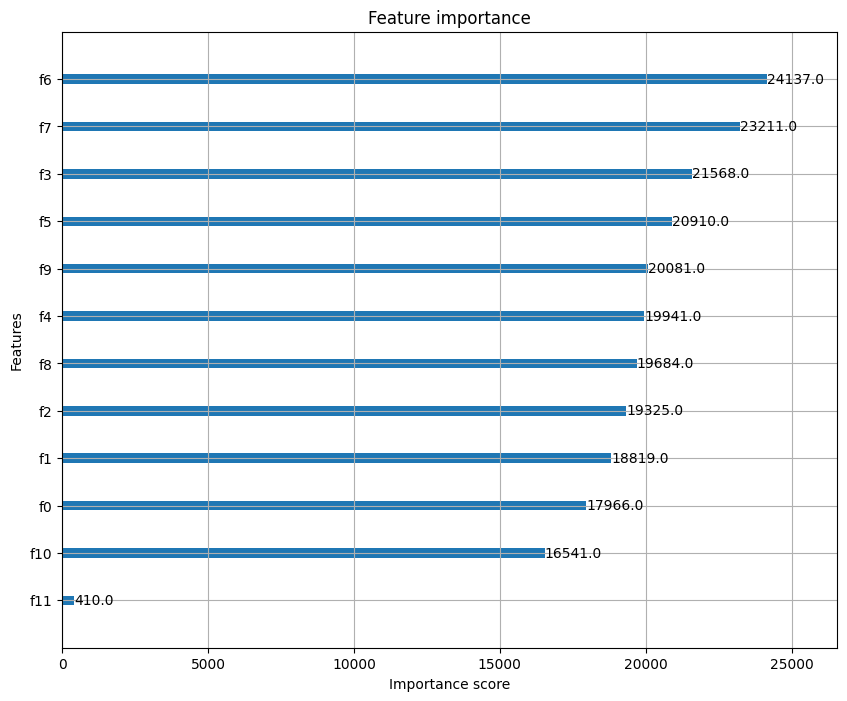

In [32]:
from xgboost import plot_importance

fig, ax= plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax)

In [35]:
xgb_importances= xgb_clf.feature_importances_
xgb_imp= pd.Series(xgb_importances, index=X_train.columns).sort_values(ascending=False)

print(xgb_imp)

type                    0.158001
alcohol                 0.136948
volatile acidity        0.087025
density                 0.079937
residual sugar          0.074586
free sulfur dioxide     0.071443
sulphates               0.068766
fixed acidity           0.065360
citric acid             0.065283
chlorides               0.065121
total sulfur dioxide    0.063982
pH                      0.063548
dtype: float32


In [40]:
xgb_imp_features= xgb_imp[xgb_imp>0.01].index
print('선택된 주요 피처들:', list(xgb_imp))

선택된 주요 피처들: [0.15800103545188904, 0.13694804906845093, 0.08702483773231506, 0.07993682473897934, 0.07458587735891342, 0.07144266366958618, 0.06876623630523682, 0.06536039710044861, 0.0652829259634018, 0.06512134522199631, 0.06398167461156845, 0.06354819983243942]


In [42]:
X_train_xgb_selected= X_train[xgb_imp_features]
X_test_xgb_selected= X_test[xgb_imp_features]

xgb_selected= XGBClassifier(
    n_estimators=best_xgb.get('n_estimators'),
    learning_rate=round(best_xgb.get('learning_rate'),5),
    max_depth=int(best_xgb.get('max_depth')),
    min_child_weight=int(best_xgb.get('min_child_weight')),
    colsample_bytree=round(best_xgb.get('colsample_bytree'),5),
    subsample=round(best_xgb.get('subsample'),5),
    gamma=round(best_xgb.get('gamma'),5),
    random_state=0,
    eval_metrics='mlogloss'
)

xgb_selected.fit(X_train_xgb_selected, y_train)

y_pred_xgb_selected= xgb_selected.predict(X_test_xgb_selected)

print('피처 중요도에 따른 피처 선택 후 성능 비교')
print("Accuracy:", accuracy_score(y_test, y_pred_xgb_selected))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_selected))

before= accuracy_score(y_test, xgb_clf.predict(X_test_scaled))
after= accuracy_score(y_test, y_pred_xgb_selected)

print('피처 선택 전 accuracy:', before)
print('피처 선택 후 accuracy:', after)

피처 중요도에 따른 피처 선택 후 성능 비교
Accuracy: 0.6890909090909091

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       1.00      0.02      0.05        41
           2       0.70      0.74      0.72       346
           3       0.67      0.80      0.73       515
           4       0.75      0.48      0.59       161
           5       1.00      0.28      0.43        29
           6       0.00      0.00      0.00         1

    accuracy                           0.69      1100
   macro avg       0.59      0.33      0.36      1100
weighted avg       0.71      0.69      0.67      1100

피처 선택 전 accuracy: 0.6581818181818182
피처 선택 후 accuracy: 0.6890909090909091
